# Analyze EYFP harringtonine screen

## Load libraries and define analysis parameters

In [1]:
options(warn = -1, repr.matrix.max.rows = 10, display.matrix.max.cols = 1000)

suppressPackageStartupMessages({
  library(org.Hs.eg.db)
  library(tidyverse)
  library(rasilabRtemplates)
})

cbPalette_12 <- c(
  "#DDCC77", "#CC6677", "#6699CC", "#661100", "#117733", "#999933",
  "#332288", "#AA4499", "#44AA99", "#882255", "#88CCEE", "#999999"
)

theme_set(theme_rasilab() +
  theme(
    axis.line = element_line(color = "grey"),
    axis.title.y = element_text(margin = margin(r = 10)),
    axis.title.x = element_text(margin = margin(t = 10))
  ))

fdr_cutoff <- 0.05
p_value_cutoff <- 0.05

set.seed(111)


## Load MaGeCK gene-level results for EYFP screens

In [2]:
mageck_gene <- list.files("../data/mageck/", full.names = T, recursive = T, pattern = "gene_summary.tsv$") %>%
  as_tibble_col("file") %>%
  filter(str_detect(file, "eyfp")) %>%
  mutate(sample_name = str_extract(file, "(?<=mageck//).+(?=/mageck.)")) %>%
  separate(sample_name, c("treatment", "control"), sep = "_vs_", remove = F) %>%
  mutate(data = map(file, . %>% read_tsv(show_col_types = F))) %>%
  select(-file) %>%
  unnest(data) %>%
  janitor::clean_names() %>%
  select(-neg_lfc) %>%
  rename(lfc = pos_lfc, gene = id) %>%
  mutate(p_value = if_else(lfc > 0, pos_p_value, neg_p_value)) %>%
  mutate(fdr = if_else(lfc > 0, pos_fdr, neg_fdr)) %>%
  mutate(goodsgrna = if_else(lfc > 0, pos_goodsgrna, neg_goodsgrna)) %>%
  mutate(fdr = if_else(is.na(fdr), 1, fdr)) %>%
  print()


# A tibble: 2,186 × 19
   sample_…¹ treat…² control gene    num neg_s…³ neg_p…⁴ neg_fdr neg_r…⁵ neg_g…⁶
   <chr>     <chr>   <chr>   <chr> <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>
 1 eyfpwt_h… eyfpwt… eyfpwt… GCN1      4  1       1           NA    2186       0
 2 eyfpwt_h… eyfpwt… eyfpwt… PDIA4     4  0.0201  0.0586      NA     140       2
 3 eyfpwt_h… eyfpwt… eyfpwt… PTCD2     4  0.0472  0.114       NA     249       1
 4 eyfpwt_h… eyfpwt… eyfpwt… TNPO3     4  0.901   0.902       NA    1960       0
 5 eyfpwt_h… eyfpwt… eyfpwt… EIF3A     3  0.607   0.618       NA    1425       1
 6 eyfpwt_h… eyfpwt… eyfpwt… NXF2B     4  0.998   0.998       NA    2182       0
 7 eyfpwt_h… eyfpwt… eyfpwt… CISD2     4  0.550   0.630       NA    1348       1
 8 eyfpwt_h… eyfpwt… eyfpwt… NOL7      4  0.656   0.691       NA    1492       1
 9 eyfpwt_h… eyfpwt… eyfpwt… EIF5…     4  0.999   0.999       NA    2185       0
10 eyfpwt_h… eyfpwt… eyfpwt… FAST…     4  0.999   0.999       NA    2184       0
# … w

## Load MaGeCK sgRNA-level results for EYFP screens

In [3]:
mageck_sgrna <- list.files("../data/mageck/", full.names = T, recursive = T, pattern = "sgrna_summary.tsv$") %>%
  as_tibble_col("file") %>%
  filter(str_detect(file, "eyfp")) %>%
  mutate(sample_name = str_extract(file, "(?<=mageck//).+(?=/mageck.)")) %>%
  separate(sample_name, c("treatment", "control"), sep = "_vs_", remove = F) %>%
  mutate(data = map(file, . %>% read_tsv(show_col_types = F))) %>%
  select(-file) %>%
  unnest(data) %>%
  janitor::clean_names() %>%
  print()


# A tibble: 8,622 × 18
   sample_n…¹ treat…² control sgrna gene  contr…³ treat…⁴ contr…⁵ treat…⁶    lfc
   <chr>      <chr>   <chr>   <chr> <chr>   <dbl>   <dbl>   <dbl>   <dbl>  <dbl>
 1 eyfpwt_ho… eyfpwt… eyfpwt… PTCD… PTCD2  1632.    5281   1632.    5281   1.69 
 2 eyfpwt_ho… eyfpwt… eyfpwt… EIF3… EIF3A    50.2    472.    50.2    472.  3.21 
 3 eyfpwt_ho… eyfpwt… eyfpwt… GTF3… GTF3A  5434.    1980.  5434.    1980. -1.46 
 4 eyfpwt_ho… eyfpwt… eyfpwt… POLR… POLR…    42.5    290.    42.5    290.  2.74 
 5 eyfpwt_ho… eyfpwt… eyfpwt… RBM2… RBM25   155.     624.   155.     624.  2.00 
 6 eyfpwt_ho… eyfpwt… eyfpwt… METT… METT…   670.    1523.   670.    1523.  1.18 
 7 eyfpwt_ho… eyfpwt… eyfpwt… CCT7… CCT7     94.6    414.    94.6    414.  2.12 
 8 eyfpwt_ho… eyfpwt… eyfpwt… PDIA… PDIA4  2432.    3965.  2432.    3965.  0.705
 9 eyfpwt_ho… eyfpwt… eyfpwt… USO1… USO1   2288.    3770.  2288.    3770.  0.720
10 eyfpwt_ho… eyfpwt… eyfpwt… FTSJ… FTSJ1    63.7    306.    63.7    306.  2.25 
# … w

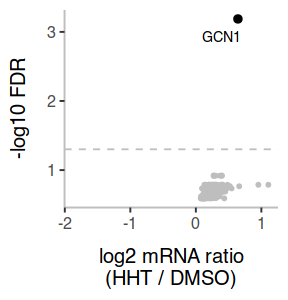

In [4]:
options(repr.plot.width = 2.4, repr.plot.height = 2.5)

plot_data <- mageck_gene %>%
  filter(str_detect(sample_name, "harr")) %>%
  filter(!str_detect(gene, "MCHERRY|PURO"))

plot_data %>%
  ggplot(aes(x = lfc, y = -log10(pos_fdr))) +
  geom_hline(aes(yintercept = -log10(fdr_cutoff)), linetype = 2, linewidth = 0.5, color = "grey") +
  geom_point(size = 1, alpha = 1, data = plot_data %>% filter(fdr > fdr_cutoff | lfc < 0), color = "grey", fill = "grey") +
  geom_point(
    size = 2, alpha = 1,
    data = plot_data %>% filter(fdr < fdr_cutoff & lfc > 0), show.legend = F
  ) +
  geom_text(aes(label = gene), data = plot_data %>% filter(fdr < fdr_cutoff & lfc > 0), nudge_x = -0.25, nudge_y = -0.25, size = 3) +
  scale_x_continuous(breaks = scales::pretty_breaks(n = 3)) +
  scale_y_continuous(breaks = scales::pretty_breaks(n = 3)) +
  scale_color_manual(values = cbPalette_12[c(3,12)]) +
  scale_fill_manual(values = cbPalette_12[c(3,12)]) +
  scale_shape_manual(values = rep(c("circle filled", "square filled", "diamond filled", "circle", "plus", "triangle filled", "triangle down filled", "diamond filled"), 5)) +
  labs(x = "log2 mRNA ratio\n(HHT / DMSO)", y = "-log10 FDR") +
  theme(legend.title = element_blank())

ggsave("../figures/eyfp_harr_volcano.pdf", width = 2.4, height = 2.5, units = "in")


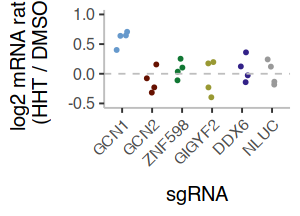

In [5]:
options(repr.plot.width = 2.5, repr.plot.height = 1.8)

plot_data <- mageck_sgrna %>%
  filter(str_detect(sample_name, "harr")) %>%
  filter(str_detect(gene, "GCN1|EIF2AK4|ZNF598|GIGYF2|DDX6$|NLUC$")) %>%
  mutate(gene = if_else(gene == "EIF2AK4", "GCN2", gene)) %>%
  mutate(gene = fct_relevel(gene, "GCN1", "GCN2", "ZNF598", "GIGYF2", "DDX6", "NLUC")) %>%
  mutate(sgrna = case_when(
    str_detect(sgrna, "1_2") ~ 1,
    str_detect(sgrna, "2_3") ~ 2,
    str_detect(sgrna, "3_4") ~ 3,
    str_detect(sgrna, "4_1") ~ 4,
  ))

mean_data <- plot_data %>% 
    group_by(gene) %>% 
    summarize(lfc_se = sd(lfc) / sqrt(n()), lfc = mean(lfc))

plot_data %>%
  ggplot(aes(x = gene, y = lfc, color = gene)) +
  geom_jitter(height = 0, width = 0.2, size = 1, show.legend = F) +
  # geom_point(data = mean_data, shape = 1, size = 2, color = "grey") +
  # geom_errorbar(aes(ymin = lfc - lfc_se, ymax = lfc + lfc_se), data = mean_data, linewidth = 1, width = 0.3, color = "black") +
  geom_hline(aes(yintercept = 0), linetype = 2, linewidth = 0.5, color = "grey") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(limits = c(-0.5, 1)) +
  scale_color_manual(values = cbPalette_12[c(3,4,5,6,7,12)]) +
  labs(y = "log2 mRNA ratio\n(HHT / DMSO)", x = "sgRNA")

ggsave("../figures/gcn1_sgrna_hht.pdf", width = 2.5, height = 1.8, units = "in")

In [6]:
plot_data  %>%
  select(sgrna, gene, lfc) %>%
  group_by(gene) %>%
  nest() %>%
  mutate(t = map_dbl(data, ~ t.test(.$lfc, mu = 0)$p.value))

gene,data,t
<fct>,<list>,<dbl>
GCN1,"c(1, 3, ....",0.003023818
GIGYF2,"c(2, 1, ....",0.696418198
NLUC,"c(2, 3, ....",0.917611429
GCN2,"c(2, 1, ....",0.342990459
ZNF598,"c(2, 3, ....",0.418791406
DDX6,"c(1, 4, ....",0.519364951
